In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'C57_MaleUrine_Exposure_cFos'
subjects = ace.list_subjects(root_directory)
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'

In [3]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [4]:
def load_subject(subject):
    df_mouse = pd.read_csv(data_directory + subject + '/cells.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

In [5]:
subject = 'F1Control'

In [6]:
f1control = load_subject(subject)

In [7]:
f1control

,x_resampled,y_resampled,z_resampled,size,source,x,y,z,id,area_name
0,1718,4737,10,36,2373,140.678611,337.107642,25.589814,367,Temporal association areas layer 1
1,1758,4241,10,42,2181,136.263803,298.309612,29.250393,158,Ventral auditory area layer 2/3
2,1672,4458,12,24,1826,131.253234,316.092921,28.162763,158,Ventral auditory area layer 2/3
3,1826,4203,12,29,1850,142.307568,294.714141,29.977053,158,Ventral auditory area layer 2/3
4,1843,4220,12,22,1652,144.297862,295.899289,29.804121,158,Ventral auditory area layer 2/3
...,...,...,...,...,...,...,...,...,...,...
3127,2434,3382,730,30,3359,186.341369,228.359298,224.779737,701,Paraventricular nucleus of the thalamus
3128,2569,3652,730,33,2274,205.632175,249.678232,225.268982,703,Nucleus of reuniens
3129,2727,1147,730,42,3778,217.007073,33.169467,229.463498,1098,olfactory nerve layer of main olfactory bulb
3130,2727,5098,730,25,2357,258.875285,376.417387,211.460680,910,Tegmental reticular nucleus


In [8]:
df_cells_energy = ace.calculate_cells_energy_per_level(df_mouse=f1control, vol=volumes, level=8)

In [9]:
df_cells_energy

,area,n_cells,energy
0,Frontal pole cerebral cortex,3,11176.798131
1,Primary motor area,4,1755.262837
2,Secondary motor area,39,14697.115573
3,Primary somatosensory area,40,11167.595783
4,Supplemental somatosensory area,14,8464.666592
...,...,...,...
293,Flocculus,0,0.000000
294,Fastigial nucleus,0,0.000000
295,Interposed nucleus,0,0.000000
296,Dentate nucleus,0,0.000000


Text(0.5, 0.98, 'Cells + energy distribution - SexualImprinting - C57_MaleUrine_Exposure_cFos - F1Control')

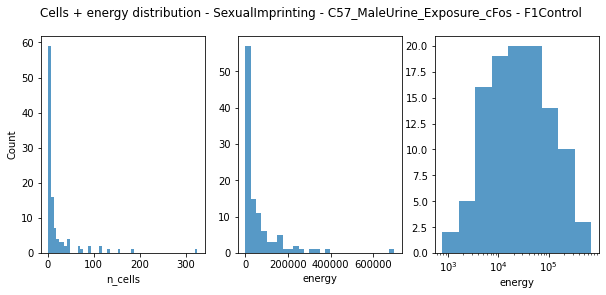

In [10]:
fig, axes = plt.subplots(1,3, figsize=[10,4])
sns.histplot(df_cells_energy[df_cells_energy.n_cells != 0]['n_cells'], ax=axes[0], edgecolor=None)
sns.histplot(df_cells_energy[df_cells_energy.energy != 0]['energy'], ax=axes[1], edgecolor=None)
sns.histplot(df_cells_energy[df_cells_energy.energy != 0]['energy'], ax=axes[2], log_scale=True, edgecolor=None)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
fig.suptitle('Cells + energy distribution' + ' - ' + experiment+ ' - ' + experimental_group + ' - ' + subject)

# TODOs
- lista Aree
- lista aree nulle
- numero di cellule per area per topo / across mice
- energy dist 
- t test across areas per topo unfam vs control - fam vs control - familiar vs unfam
- rank numero di cellule per topo / across topi

# Analysis on C57

In [10]:
# TODO: this is barbaric but quick
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
                                                                          vol=volumes, 
                                                                          level=8) for subject in subjects}

In [11]:
np.save('dict_results_across_mice_c57_700.npy', dict_results_across_mice)

In [12]:
dict_results_across_mice['F10Control']

,area,n_cells,energy
0,Frontal pole cerebral cortex,6,34155.109732
1,Primary motor area,129,73799.747858
2,Secondary motor area,89,36615.003663
3,Primary somatosensory area,369,94079.108594
4,Supplemental somatosensory area,72,48363.397080
...,...,...,...
293,Flocculus,0,0.000000
294,Fastigial nucleus,0,0.000000
295,Interposed nucleus,0,0.000000
296,Dentate nucleus,0,0.000000


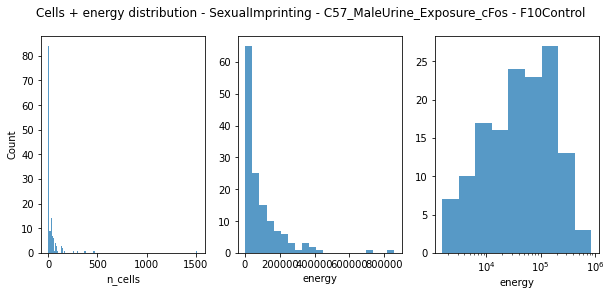

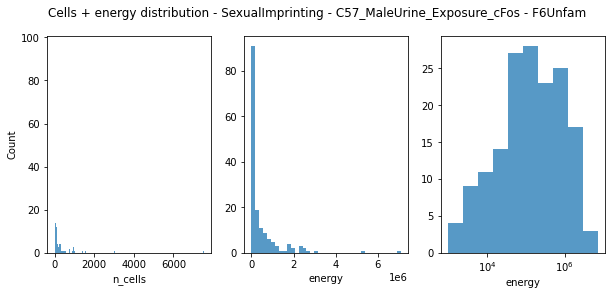

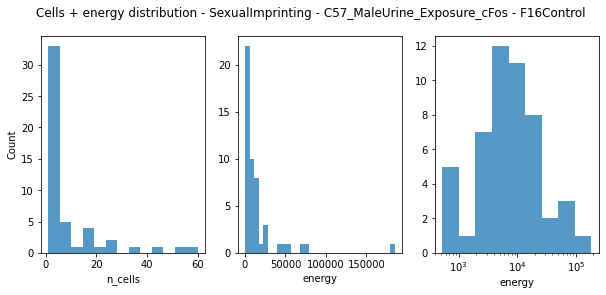

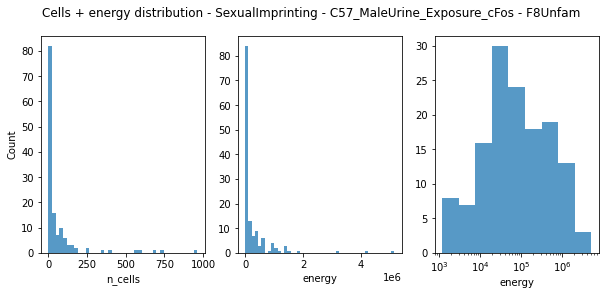

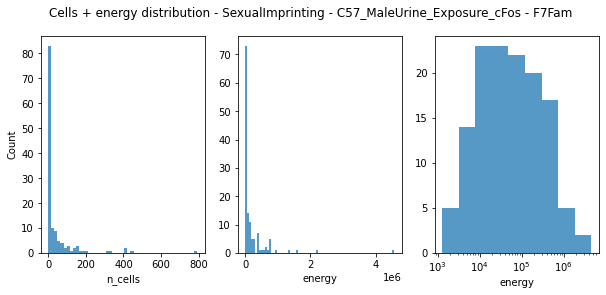

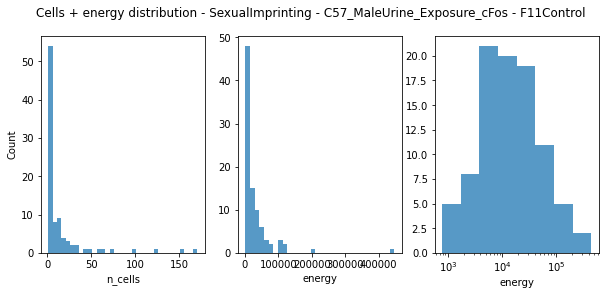

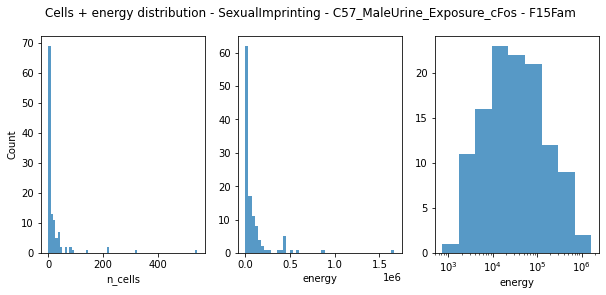

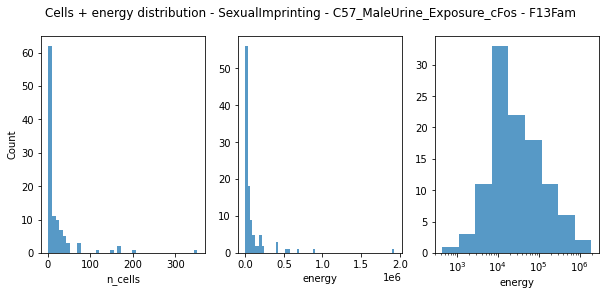

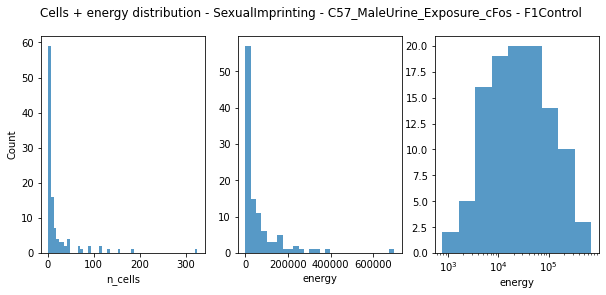

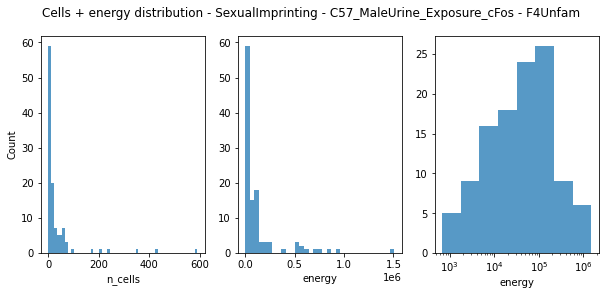

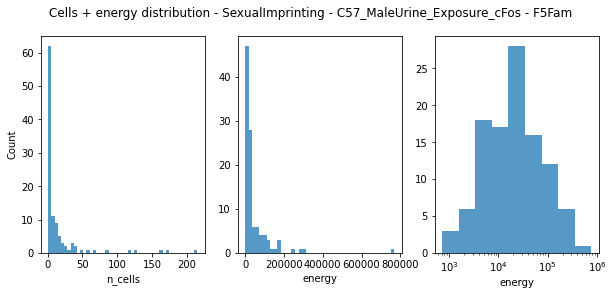

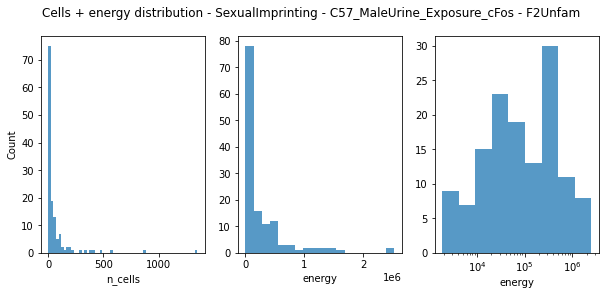

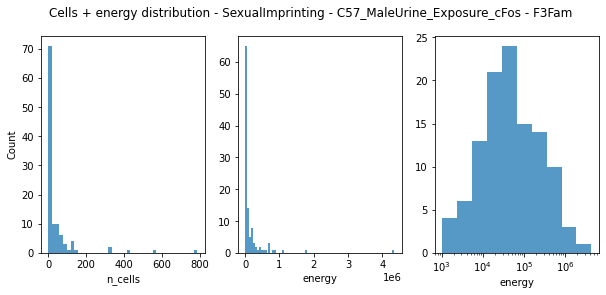

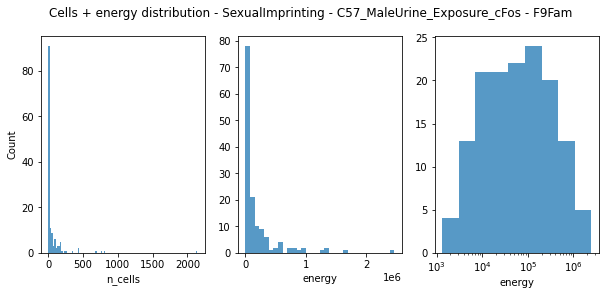

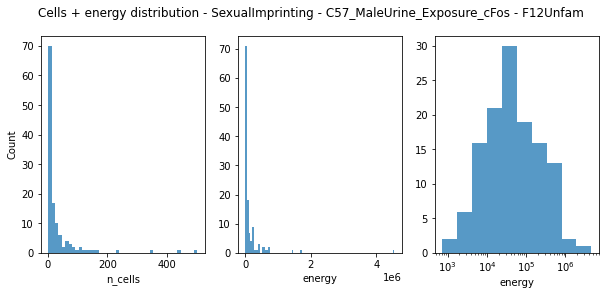

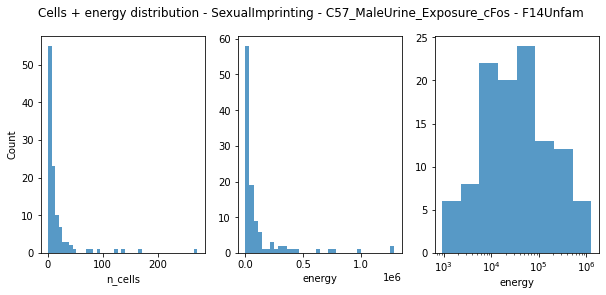

In [13]:
for subject in subjects:
    df_sub = dict_results_across_mice[subject]
    fig, axes = plt.subplots(1,3, figsize=[10,4])
    sns.histplot(df_sub[df_sub.n_cells != 0]['n_cells'], ax=axes[0], edgecolor=None)
    sns.histplot(df_sub[df_sub.energy != 0]['energy'], ax=axes[1], edgecolor=None)
    sns.histplot(df_sub[df_sub.energy != 0]['energy'], ax=axes[2], log_scale=True, edgecolor=None)
    axes[1].set_ylabel('')
    axes[2].set_ylabel('')
    fig.suptitle('Cells + energy distribution' + ' - ' + experiment+ ' - ' + experimental_group + ' - ' + subject)

# Rank areas with highest cell count

In [14]:
df_cells_energy[df_cells_energy.n_cells != 0].sort_values(by=['n_cells'], ascending=False)

,area,n_cells,energy
33,Piriform area,326,155180.879227
39,Dentate gyrus,185,151251.534339
30,Anterior olfactory nucleus,157,145717.177159
42,Entorhinal area,133,59659.523018
164,Inferior colliculus,114,146722.083455
...,...,...,...
201,Parabrachial nucleus,1,4173.324338
78,Ventral medial nucleus of the thalamus,1,5924.996722
174,Midbrain reticular nucleus,1,769.703807
163,Superior colliculus sensory related,1,1975.128636


In [15]:
db_ranked_cells = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells != 0].sort_values(by=['n_cells'],
                                                                ascending=False) for subject in subjects}

In [16]:
subjects

['F10Control',
 'F6Unfam',
 'F16Control',
 'F8Unfam',
 'F7Fam',
 'F11Control',
 'F15Fam',
 'F13Fam',
 'F1Control',
 'F4Unfam',
 'F5Fam',
 'F2Unfam',
 'F3Fam',
 'F9Fam',
 'F12Unfam',
 'F14Unfam']

In [17]:
db_ranked_cells['F8Unfam'][0:30]

,area,n_cells,energy
28,Main olfactory bulb,964,3.985122e+05
13,Primary visual area,726,5.494924e+05
33,Piriform area,695,3.532331e+05
68,Medial amygdalar nucleus,586,1.897410e+06
35,Cortical amygdalar area,575,1.186279e+06
56,Caudoputamen,387,1.026409e+05
30,Anterior olfactory nucleus,361,3.578669e+05
54,Basomedial amygdalar nucleus,251,1.062672e+06
42,Entorhinal area,242,1.126909e+05
39,Dentate gyrus,186,1.792652e+05


# Rank areas with highest energy

In [18]:
db_ranked_energy = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].energy != 0].sort_values(by=['energy'],
                                                                ascending=False) for subject in subjects}

In [19]:
db_ranked_energy['F8Unfam'][0:30]

,area,n_cells,energy
149,Ventral premammillary nucleus,136,5.154997e+06
65,Bed nucleus of the accessory olfactory tract,21,4.204250e+06
132,Posterodorsal preoptic nucleus,7,3.238480e+06
68,Medial amygdalar nucleus,586,1.897410e+06
67,Intercalated amygdalar nucleus,47,1.472243e+06
147,Medial preoptic nucleus,94,1.450713e+06
160,Tuberal nucleus,114,1.417571e+06
14,Posterolateral visual area,183,1.363200e+06
35,Cortical amygdalar area,575,1.186279e+06
148,Dorsal premammillary nucleus,22,1.063204e+06


# List areas with null cell count

In [20]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}

<AxesSubplot:>

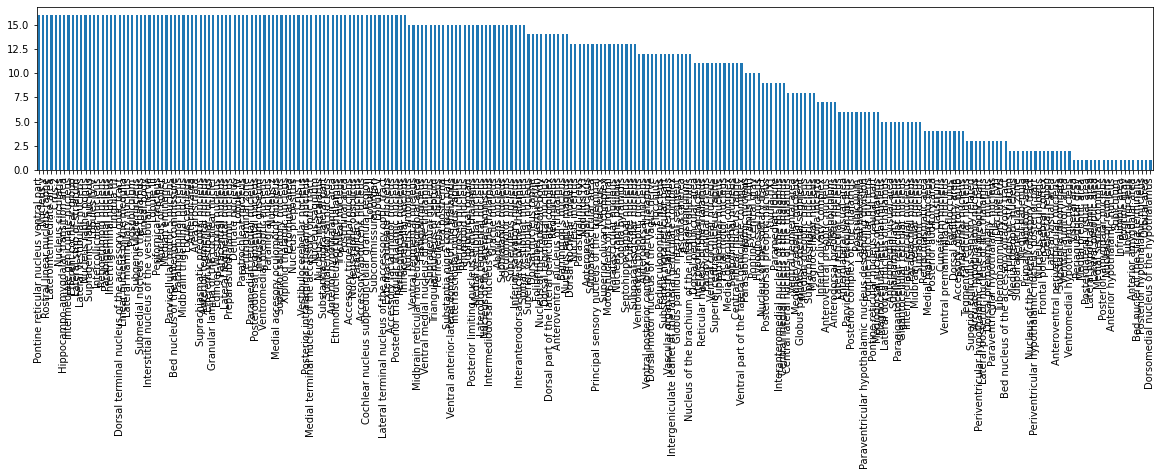

In [21]:
# make histogram of these
null_areas = [db_null_count[subjects[0]].area.values]
for subject in subjects[1:]:
    null_areas.append(db_null_count[subject].area.values)
null_areas = np.hstack(null_areas)
fig, ax = plt.subplots(1,1,figsize=(20,3))
pd.Series(null_areas).value_counts(sort=True).plot(kind='bar', axes=ax)
# plt.figure(figsize=(20,3))
# plt.hist(null_areas, bins=len())
# plt.xticks(rotation=90)

In [22]:
# print areas that are null for all mice
df = pd.DataFrame(pd.Series(null_areas).value_counts(sort=False))
df.columns = ['counts']
df = df[df.counts == 16]
print(df.to_string())

                                                       counts
Accessory trigeminal nucleus                               16
Anterior hypothalamic area                                 16
Nucleus sagulum                                            16
Vestibulocerebellar nucleus                                16
Posterodorsal tegmental nucleus                            16
Parasolitary nucleus                                       16
Nucleus raphe obscurus                                     16
Accessory facial motor nucleus                             16
Accessory abducens nucleus                                 16
Subcommissural organ                                       16
Lateral terminal nucleus of the accessory optic tract      16
Posterior triangular thalamic nucleus                      16
Infracerebellar nucleus                                    16
Pineal body                                                16
Prosubiculum                                               16
Linear n

# List areas with no volume

In [23]:
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}

<AxesSubplot:>

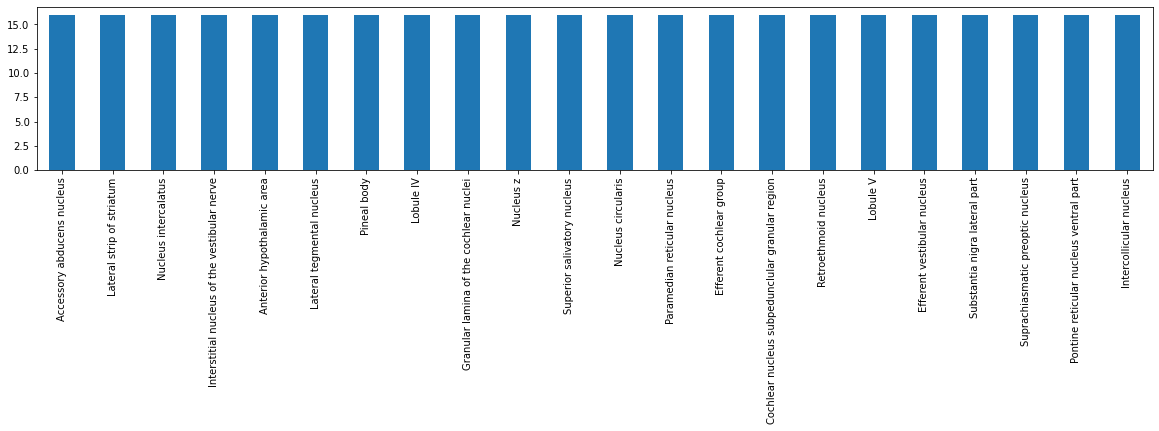

In [24]:
# make histogram of these
null_volume = [db_null_volume[subjects[0]].area.values]
for subject in subjects[1:]:
    null_volume.append(db_null_volume[subject].area.values)
null_volume = np.hstack(null_volume)
fig, ax = plt.subplots(1,1,figsize=(20,3))
pd.Series(null_volume).value_counts(sort=True).plot(kind='bar', axes=ax)

In [25]:
# print areas that are null for all mice
df = pd.DataFrame(pd.Series(null_volume).value_counts(sort=False))
df.columns = ['counts']
df = df[df.counts == 16]
print(df.to_string())

                                                 counts
Intercollicular nucleus                              16
Nucleus intercalatus                                 16
Interstitial nucleus of the vestibular nerve         16
Anterior hypothalamic area                           16
Lateral tegmental nucleus                            16
Pineal body                                          16
Lobule IV                                            16
Granular lamina of the cochlear nuclei               16
Nucleus z                                            16
Superior salivatory nucleus                          16
Nucleus circularis                                   16
Paramedian reticular nucleus                         16
Efferent cochlear group                              16
Cochlear nucleus subpedunclular granular region      16
Retroethmoid nucleus                                 16
Lobule V                                             16
Efferent vestibular nucleus                     

# Divide mice into experimental groups: FAM/UNFAM/CONTROL

In [26]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
experimental_groups

{'Control': ['F10Control', 'F16Control', 'F11Control', 'F1Control'],
 'Unfam': ['F6Unfam', 'F8Unfam', 'F4Unfam', 'F2Unfam', 'F12Unfam', 'F14Unfam'],
 'Fam': ['F7Fam', 'F15Fam', 'F13Fam', 'F5Fam', 'F3Fam', 'F9Fam']}

# Calculate cell count across experimental groups

In [27]:
def calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='n_cells'):
    """
    Value can either be n_cells or energy
    """
    df_control = pd.DataFrame()
    df_fam = pd.DataFrame()
    df_unfam = pd.DataFrame()
    for subject in experimental_groups['Control']:
        df_control['area'] = dict_results_across_mice[subject]['area']
        df_control[subject] = dict_results_across_mice[subject][value]
    for subject in experimental_groups['Fam']:
        df_fam['area'] = dict_results_across_mice[subject]['area']
        df_fam[subject] = dict_results_across_mice[subject][value]
    for subject in experimental_groups['Unfam']:
        df_unfam['area'] = dict_results_across_mice[subject]['area']
        df_unfam[subject] = dict_results_across_mice[subject][value]
    return df_control, df_fam, df_unfam

In [28]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [29]:
df_control_cell_count

,area,F10Control,F16Control,F11Control,F1Control
0,Frontal pole cerebral cortex,6,0,14,3
1,Primary motor area,129,1,5,4
2,Secondary motor area,89,9,18,39
3,Primary somatosensory area,369,19,9,40
4,Supplemental somatosensory area,72,1,11,14
...,...,...,...,...,...
293,Flocculus,0,0,0,0
294,Fastigial nucleus,0,0,0,0
295,Interposed nucleus,0,0,0,0
296,Dentate nucleus,0,0,0,0


In [30]:
df_fam_cell_count

,area,F7Fam,F15Fam,F13Fam,F5Fam,F3Fam,F9Fam
0,Frontal pole cerebral cortex,2,7,0,4,2,5
1,Primary motor area,5,10,18,5,39,32
2,Secondary motor area,31,31,27,19,15,60
3,Primary somatosensory area,25,34,47,22,71,109
4,Supplemental somatosensory area,20,36,19,12,36,15
...,...,...,...,...,...,...,...
293,Flocculus,1,1,0,0,0,4
294,Fastigial nucleus,0,0,0,0,0,0
295,Interposed nucleus,0,0,0,1,0,0
296,Dentate nucleus,0,0,0,0,0,0


In [31]:
df_unfam_cell_count

,area,F6Unfam,F8Unfam,F4Unfam,F2Unfam,F12Unfam,F14Unfam
0,Frontal pole cerebral cortex,126,16,4,7,8,2
1,Primary motor area,488,32,22,15,4,14
2,Secondary motor area,1546,78,18,72,39,40
3,Primary somatosensory area,956,100,39,121,27,22
4,Supplemental somatosensory area,968,48,6,28,13,4
...,...,...,...,...,...,...,...
293,Flocculus,0,0,0,14,0,0
294,Fastigial nucleus,1,0,0,0,0,0
295,Interposed nucleus,0,0,0,0,0,0
296,Dentate nucleus,0,0,0,0,0,0


## Calculate t-tests across groups per area

In [32]:
def ttest_across_groups(df_control, df_fam, df_unfam):
    df_ttest = pd.DataFrame(columns=['area', 'pval_Control_vs_Fam', 
                                     'pval_Control_vs_Unfam', 'pval_Fam_vs_Unfam'])
    df_ttest['area'] = df_control['area']
    # loop over areas
    for area in df_control['area'].values:
        # compare control and fam
        pval_control_fam = ttest_ind(df_control[df_control['area'] == area].values[0][1:],
             df_fam[df_fam['area'] == area].values[0][1:])
        # assign pvalue to dataframe
        df_ttest['pval_Control_vs_Fam'][df_ttest.loc[df_ttest['area'] == area].index[0]] = pval_control_fam[1]

        # compare control and unfam
        pval_control_unfam = ttest_ind(df_control[df_control['area'] == area].values[0][1:],
             df_unfam[df_unfam['area'] == area].values[0][1:])
        # assign pvalue to dataframe
        df_ttest['pval_Control_vs_Unfam'][df_ttest.loc[df_ttest['area'] == area].index[0]] = pval_control_unfam[1]

        # compare fam and unfam
        pval_fam_unfam = ttest_ind(df_fam[df_fam['area'] == area].values[0][1:],
             df_unfam[df_unfam['area'] == area].values[0][1:])
        # assign pvalue to dataframe
        df_ttest['pval_Fam_vs_Unfam'][df_ttest.loc[df_ttest['area'] == area].index[0]] = pval_fam_unfam[1]
    return df_ttest


In [33]:
df_ttest_ncells = ttest_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.39707,0.415536,0.25844
1,Primary motor area,0.540074,0.563031,0.347246
2,Secondary motor area,0.626245,0.429148,0.307761
3,Primary somatosensory area,0.436573,0.624565,0.314393
4,Supplemental somatosensory area,0.916036,0.461238,0.350899
...,...,...,...,...
293,Flocculus,0.241504,0.446813,0.593381
294,Fastigial nucleus,NaN,0.446813,0.340893
295,Interposed nucleus,0.446813,NaN,0.340893
296,Dentate nucleus,NaN,NaN,NaN


In [34]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_ttest_not_null_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.39707,0.415536,0.25844
1,Primary motor area,0.540074,0.563031,0.347246
2,Secondary motor area,0.626245,0.429148,0.307761
3,Primary somatosensory area,0.436573,0.624565,0.314393
4,Supplemental somatosensory area,0.916036,0.461238,0.350899
...,...,...,...,...
291,Copula pyramidis,0.77905,0.77905,1
292,Paraflocculus,0.0875097,0.346594,0.430838
293,Flocculus,0.241504,0.446813,0.593381
294,Fastigial nucleus,NaN,0.446813,0.340893


In [35]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Medial preoptic nucleus,0.00262871
Cortical amygdalar area,0.006737
Medial amygdalar nucleus,0.0086571
Bed nuclei of the stria terminalis,0.0208919
Bed nucleus of the accessory olfactory tract,0.0239483
Tuberal nucleus,0.0263196
Intercalated amygdalar nucleus,0.0320833
Fasciola cinerea,0.0352652
Ventromedial hypothalamic nucleus,0.0380056


In [36]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Cortical amygdalar area,0.00460707
Medial preoptic nucleus,0.00881791
Periventricular hypothalamic nucleus posterior part,0.010056
Medial amygdalar nucleus,0.0103031
Bed nuclei of the stria terminalis,0.0182939
Posterior amygdalar nucleus,0.0210745
Ventromedial hypothalamic nucleus,0.0221525
Nucleus of the solitary tract,0.0231052
Anterior amygdalar area,0.028484


In [37]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Fasciola cinerea,0.0101196
Simple lobule,0.0134385
Posterior hypothalamic nucleus,0.0153221
Supramammillary nucleus,0.0217184
Posterodorsal preoptic nucleus,0.024491
Medial preoptic nucleus,0.0343519
Medial mammillary nucleus,0.050643
Dorsal premammillary nucleus,0.0527809
Dorsomedial nucleus of the hypothalamus,0.056834


## Code to calculate cross corr matrix

In [38]:
def cross_corr(df):
    # remove areas where no cells have been detected in any mouse
    # and remove rows with all nans
    corr_matrix = df.set_index('area').loc[
        ~(df.set_index('area')==0).all(axis=1)].dropna(axis=0).T.corr(method='pearson')
    return corr_matrix

## Calculate cross corr across groups per area on cell count

In [39]:
corr_matrix_control_ncells = cross_corr(df_control_cell_count)
corr_matrix_control_ncells

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Superior vestibular nucleus,Hypoglossal nucleus,Declive (VI),Folium-tuber vermis (VII),Pyramus (VIII),Uvula (IX),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,0.049985,0.018181,-0.016818,0.111069,-0.530577,0.097955,-0.011892,0.142995,-0.242111,...,-0.304500,0.027682,0.288528,0.913500,0.352332,0.527410,-0.480640,0.815088,-0.304500,0.203419
Primary motor area,0.049985,1.000000,0.941107,0.996783,0.988764,0.671451,0.986757,0.638878,0.238469,0.318856,...,-0.326141,0.999634,0.810886,-0.315534,0.948714,-0.555707,-0.223020,0.592448,-0.326141,0.811868
Secondary motor area,0.018181,0.941107,1.000000,0.954966,0.974614,0.809823,0.979359,0.861257,0.544784,0.614739,...,0.004658,0.936262,0.577443,-0.386616,0.856367,-0.330785,0.091381,0.476008,0.004658,0.570489
Primary somatosensory area,-0.016818,0.996783,0.954966,1.000000,0.987510,0.728281,0.987204,0.673856,0.271673,0.375563,...,-0.265864,0.997229,0.768178,-0.384879,0.921646,-0.563559,-0.153015,0.530311,-0.265864,0.773483
Supplemental somatosensory area,0.111069,0.988764,0.974614,0.987510,1.000000,0.694352,0.999741,0.733561,0.374899,0.423481,...,-0.217725,0.984945,0.744954,-0.279932,0.945721,-0.430983,-0.133259,0.610560,-0.217725,0.736482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uvula (IX),0.527410,-0.555707,-0.330785,-0.563559,-0.430983,-0.390567,-0.425628,0.095398,0.535303,0.242937,...,0.577350,-0.577350,-0.640184,0.577350,-0.408248,1.000000,0.390567,0.000000,0.577350,-0.707107
Simple lobule,-0.480640,-0.223020,0.091381,-0.153015,-0.133259,0.525424,-0.110824,0.534051,0.706861,0.829098,...,0.977140,-0.225494,-0.750104,-0.526152,-0.425195,0.390567,1.000000,-0.650945,0.977140,-0.736460
Paramedian lobule,0.815088,0.592448,0.476008,0.530311,0.610560,-0.130189,0.595880,0.209876,0.076472,-0.173526,...,-0.577350,0.577350,0.768221,0.577350,0.816497,0.000000,-0.650945,1.000000,-0.577350,0.707107


In [40]:
corr_matrix_fam_ncells = cross_corr(df_fam_cell_count)
corr_matrix_fam_ncells

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Declive (VI),Pyramus (VIII),Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Interposed nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,-0.140416,0.378137,0.086852,0.206049,0.616489,-0.457447,0.288338,0.446619,-0.440720,...,0.044605,0.637709,-0.511605,0.825137,0.364662,0.373830,-0.260931,0.298253,0.464140,0.130466
Primary motor area,-0.140416,1.000000,0.198329,0.864614,0.316763,-0.065398,0.132102,0.865741,-0.310261,0.429806,...,-0.406146,-0.431552,-0.013917,0.152260,0.069665,0.324619,-0.447501,0.128016,0.304520,-0.447501
Secondary motor area,0.378137,0.198329,1.000000,0.652168,-0.352034,-0.045800,0.572248,0.591285,0.691445,-0.794588,...,0.229517,0.020844,-0.023370,0.733236,0.097934,0.802475,0.015458,0.963212,0.969500,-0.355533
Primary somatosensory area,0.086852,0.864614,0.652168,1.000000,-0.006859,-0.143266,0.416330,0.961037,0.107045,-0.064173,...,-0.288748,-0.387054,-0.034164,0.467380,0.172072,0.709873,-0.385986,0.596771,0.722315,-0.429959
Supplemental somatosensory area,0.206049,0.316763,-0.352034,-0.006859,1.000000,0.819939,-0.740250,0.206841,-0.427179,0.473124,...,0.246839,0.567886,-0.114965,0.184974,-0.191835,-0.552112,-0.140385,-0.537940,-0.271295,-0.514746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paramedian lobule,0.373830,0.324619,0.802475,0.709873,-0.552112,-0.365075,0.516764,0.641858,0.553912,-0.503277,...,-0.368804,-0.363636,-0.242082,0.533002,0.376889,1.000000,-0.269680,0.863110,0.852803,0.134840
Copula pyramidis,-0.260931,-0.447501,0.015458,-0.385986,-0.140385,-0.102169,0.065233,-0.442013,0.547723,-0.245677,...,0.664245,0.134840,-0.264575,-0.316228,-0.894427,-0.269680,1.000000,0.130632,0.000000,-0.200000
Paraflocculus,0.298253,0.128016,0.963212,0.596771,-0.537940,-0.253584,0.634854,0.501905,0.787054,-0.780116,...,0.132710,-0.140916,-0.138248,0.578335,0.029210,0.863110,0.130632,1.000000,0.950121,-0.182885


In [41]:
corr_matrix_unfam_ncells = cross_corr(df_unfam_cell_count)
corr_matrix_unfam_ncells

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Folium-tuber vermis (VII),Pyramus (VIII),Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Fastigial nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,0.996552,0.997063,0.995447,0.998125,0.997188,0.998715,0.992917,0.885561,0.981760,...,-0.253395,-0.352893,-0.277585,0.995122,0.534220,0.151205,-0.233258,0.571305,-0.203052,0.995122
Primary motor area,0.996552,1.000000,0.998826,0.995269,0.999206,0.999122,0.995517,0.991836,0.890347,0.989384,...,-0.208426,-0.349687,-0.240241,0.998834,0.556888,0.108753,-0.188051,0.546696,-0.205879,0.998834
Secondary motor area,0.997063,0.998826,1.000000,0.996635,0.999818,0.999906,0.994126,0.989978,0.883315,0.985521,...,-0.207398,-0.328558,-0.241634,0.999328,0.556302,0.117059,-0.225026,0.520126,-0.181757,0.999328
Primary somatosensory area,0.995447,0.995269,0.996635,1.000000,0.996806,0.997400,0.991329,0.992626,0.872652,0.975266,...,-0.251851,-0.392940,-0.282026,0.993845,0.606979,0.190414,-0.229178,0.540327,-0.119813,0.993845
Supplemental somatosensory area,0.998125,0.999206,0.999818,0.996806,1.000000,0.999851,0.995741,0.991935,0.887466,0.986552,...,-0.219798,-0.338535,-0.252109,0.999101,0.552125,0.121192,-0.217269,0.534321,-0.189452,0.999101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paramedian lobule,0.151205,0.108753,0.117059,0.190414,0.121192,0.124616,0.144781,0.155198,-0.123797,-0.009745,...,-0.415227,-0.656532,-0.324718,0.083045,0.585491,1.000000,-0.415227,0.423239,0.581318,0.083045
Copula pyramidis,-0.233258,-0.188051,-0.225026,-0.229178,-0.217269,-0.218058,-0.219936,-0.139246,0.149071,-0.079798,...,-0.200000,-0.316228,-0.238007,-0.200000,-0.108465,-0.415227,1.000000,0.050965,-0.200000,-0.200000
Paraflocculus,0.571305,0.546696,0.520126,0.540327,0.534321,0.526622,0.602824,0.578937,0.474836,0.521519,...,-0.407718,-0.644658,-0.303249,0.509647,0.276395,0.423239,0.050965,1.000000,-0.407718,0.509647


## Plot cross corr matrix across groups per area on cell count

Text(0.5, 1.0, 'CONTROL')

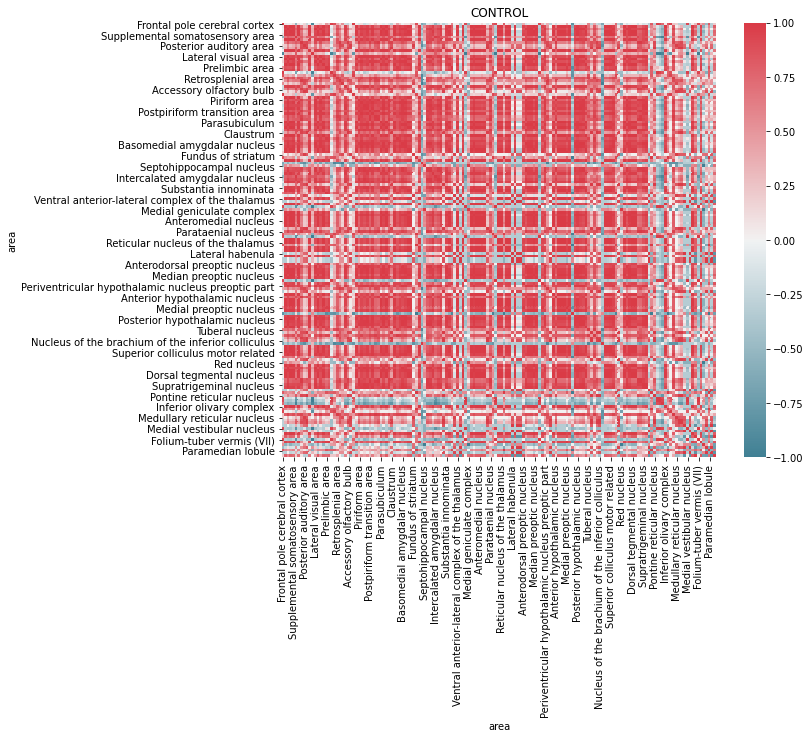

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

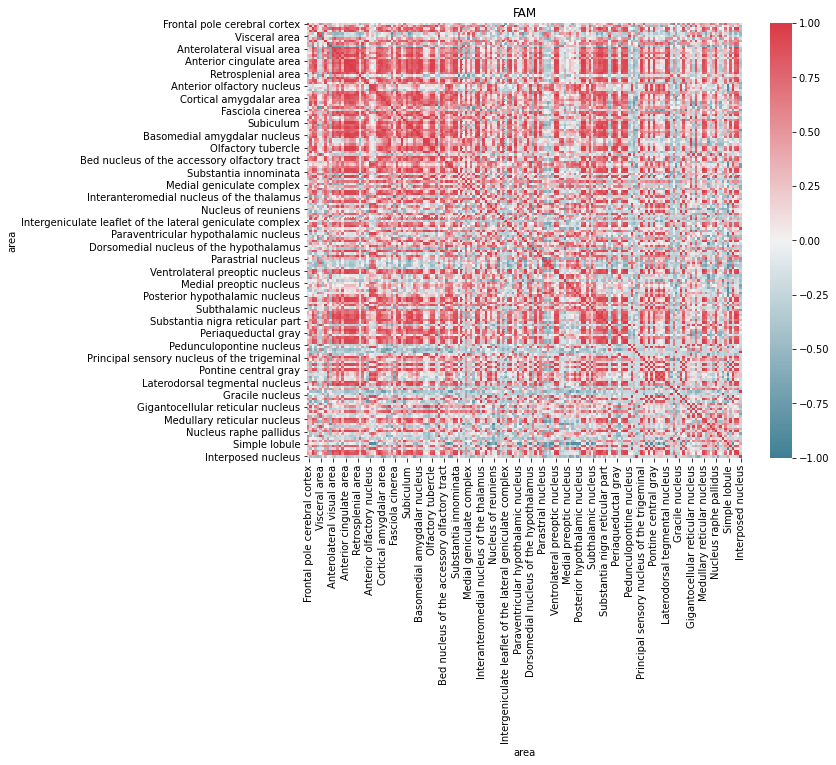

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

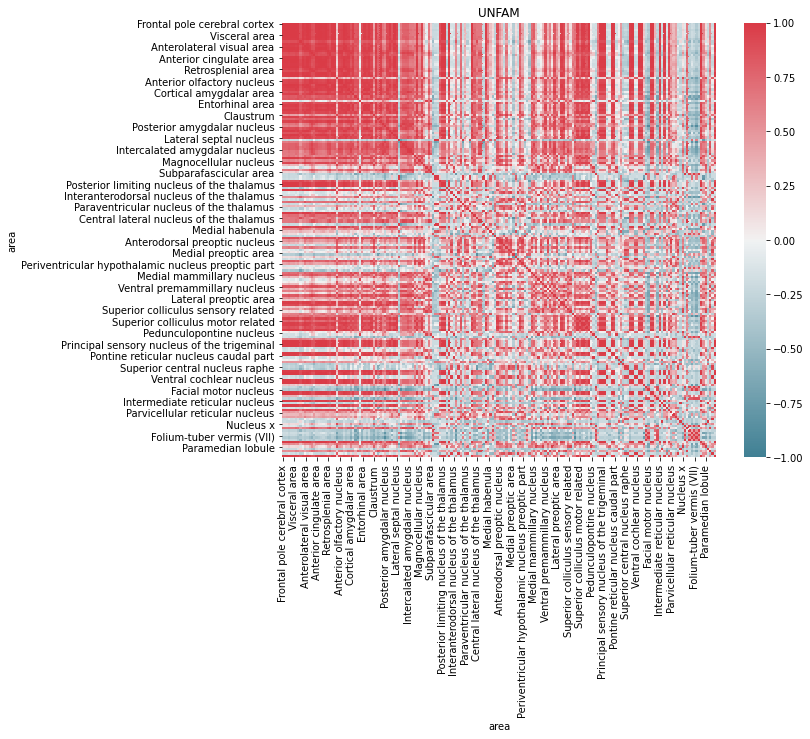

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy across experimental groups

In [45]:
df_control_energy, df_fam_energy, df_unfam_energy = \
calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

In [46]:
df_control_energy

,area,F10Control,F16Control,F11Control,F1Control
0,Frontal pole cerebral cortex,34155.109732,0.000000,48671.732171,11176.798131
1,Primary motor area,73799.747858,803.459827,2767.626164,1755.262837
2,Secondary motor area,36615.003663,2854.359312,7722.262923,14697.115573
3,Primary somatosensory area,94079.108594,5435.231534,2078.248171,11167.595783
4,Supplemental somatosensory area,48363.397080,528.565877,6230.632037,8464.666592
...,...,...,...,...,...
293,Flocculus,0.000000,0.000000,0.000000,0.000000
294,Fastigial nucleus,0.000000,0.000000,0.000000,0.000000
295,Interposed nucleus,0.000000,0.000000,0.000000,0.000000
296,Dentate nucleus,0.000000,0.000000,0.000000,0.000000


In [47]:
df_fam_energy

,area,F7Fam,F15Fam,F13Fam,F5Fam,F3Fam,F9Fam
0,Frontal pole cerebral cortex,8687.948243,28450.577687,0.000000,15467.711495,8784.058295,25867.620040
1,Primary motor area,3503.818669,6968.776159,11197.543235,2441.547330,21579.593486,16108.452242
2,Secondary motor area,11071.736303,13721.535783,11500.501984,6643.800049,6175.397670,23112.848391
3,Primary somatosensory area,6169.752568,8739.549012,13748.597735,5724.800531,17759.235717,26017.228033
4,Supplemental somatosensory area,11804.045822,24799.965827,15345.411820,6622.171715,22486.253074,9259.926053
...,...,...,...,...,...,...,...
293,Flocculus,5967.481698,2919.719306,0.000000,0.000000,0.000000,17186.414681
294,Fastigial nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
295,Interposed nucleus,0.000000,0.000000,0.000000,3644.054341,0.000000,0.000000
296,Dentate nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
df_unfam_energy

,area,F6Unfam,F8Unfam,F4Unfam,F2Unfam,F12Unfam,F14Unfam
0,Frontal pole cerebral cortex,695640.551851,91965.306016,16809.247638,38504.089586,33107.910624,9701.108375
1,Primary motor area,236626.513630,20148.436835,12036.905269,7284.794485,2095.347478,9387.440763
2,Secondary motor area,643028.749277,32027.314280,7870.642043,27115.810301,15907.068887,19447.487755
3,Primary somatosensory area,208613.311311,26008.450385,9584.631055,29706.548081,6097.570422,7259.301438
4,Supplemental somatosensory area,681594.452313,32005.006393,3464.225323,17220.894486,7409.311104,3206.413066
...,...,...,...,...,...,...,...
293,Flocculus,0.000000,0.000000,0.000000,59914.055374,0.000000,0.000000
294,Fastigial nucleus,6674.739175,0.000000,0.000000,0.000000,0.000000,0.000000
295,Interposed nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
296,Dentate nucleus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [49]:
df_ttest_energy = ttest_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy)
df_ttest_energy

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.411528,0.394929,0.255506
1,Primary motor area,0.538143,0.584225,0.344686
2,Secondary motor area,0.621105,0.426762,0.305337
3,Primary somatosensory area,0.421155,0.667098,0.309686
4,Supplemental somatosensory area,0.930837,0.460815,0.351415
...,...,...,...,...
293,Flocculus,0.241116,0.446813,0.597962
294,Fastigial nucleus,NaN,0.446813,0.340893
295,Interposed nucleus,0.446813,NaN,0.340893
296,Dentate nucleus,NaN,NaN,NaN


In [50]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_ttest_not_null_energy

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.411528,0.394929,0.255506
1,Primary motor area,0.538143,0.584225,0.344686
2,Secondary motor area,0.621105,0.426762,0.305337
3,Primary somatosensory area,0.421155,0.667098,0.309686
4,Supplemental somatosensory area,0.930837,0.460815,0.351415
...,...,...,...,...
291,Copula pyramidis,0.796479,0.641787,0.536181
292,Paraflocculus,0.119089,0.347319,0.47991
293,Flocculus,0.241116,0.446813,0.597962
294,Fastigial nucleus,NaN,0.446813,0.340893


In [51]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Medial preoptic nucleus,0.00475805
Medial amygdalar nucleus,0.0167212
Cortical amygdalar area,0.0187642
Bed nuclei of the stria terminalis,0.0255039
Tuberal nucleus,0.0277758
Bed nucleus of the accessory olfactory tract,0.037427
Fasciola cinerea,0.0393707
Ventromedial hypothalamic nucleus,0.0450243
Posterior auditory area,0.0451783


In [52]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Medial preoptic nucleus,0.0082575
Cortical amygdalar area,0.0147569
Medial amygdalar nucleus,0.0199332
Periventricular hypothalamic nucleus posterior part,0.0253272
Bed nuclei of the stria terminalis,0.0255449
Anteroventral periventricular nucleus,0.0283798
Ventromedial hypothalamic nucleus,0.030372
Anterior amygdalar area,0.0335083
Nucleus of the solitary tract,0.034465


In [53]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Fasciola cinerea,0.0117615
Simple lobule,0.0168505
Posterior hypothalamic nucleus,0.0202964
Medial preoptic nucleus,0.0207758
Posterodorsal preoptic nucleus,0.0253749
Supramammillary nucleus,0.025427
Medial septal complex,0.0441099
Medial mammillary nucleus,0.0445573
Dorsomedial nucleus of the hypothalamus,0.0506741


## Calculate cross corr matrix across experimental groups on energy

In [54]:
corr_matrix_control_energy = cross_corr(df_control_energy)
corr_matrix_control_energy

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Superior vestibular nucleus,Hypoglossal nucleus,Declive (VI),Folium-tuber vermis (VII),Pyramus (VIII),Uvula (IX),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,0.343080,0.341813,0.271331,0.384312,-0.142221,0.381407,0.260666,0.164041,-0.113278,...,-0.373553,0.322937,0.544726,0.762947,0.730031,0.045037,-0.559884,0.894111,-0.373553,0.409570
Primary motor area,0.343080,1.000000,0.947992,0.995400,0.990370,0.804981,0.986725,0.710878,0.214525,0.370111,...,-0.333624,0.999752,0.870548,-0.314888,0.883911,-0.523218,-0.319683,0.698731,-0.333624,0.925450
Secondary motor area,0.341813,0.947992,1.000000,0.961376,0.981037,0.879808,0.985743,0.897667,0.513961,0.630174,...,-0.034656,0.945377,0.697511,-0.346529,0.810765,-0.231829,-0.051755,0.623030,-0.034656,0.762741
Primary somatosensory area,0.271331,0.995400,0.961376,1.000000,0.990075,0.858061,0.988124,0.748446,0.264646,0.441086,...,-0.257412,0.996371,0.821988,-0.394861,0.839260,-0.489605,-0.233380,0.633723,-0.257412,0.891919
Supplemental somatosensory area,0.384312,0.990370,0.981037,0.990075,1.000000,0.827087,0.999659,0.796331,0.343449,0.470584,...,-0.226237,0.988293,0.820403,-0.294242,0.882538,-0.400449,-0.233014,0.703892,-0.226237,0.873583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uvula (IX),0.045037,-0.523218,-0.231829,-0.489605,-0.400449,-0.207079,-0.377875,0.207440,0.705822,0.475732,...,0.845990,-0.533349,-0.733606,0.220709,-0.444446,1.000000,0.721274,-0.332004,0.845990,-0.760140
Simple lobule,-0.559884,-0.319683,-0.051755,-0.233380,-0.233014,0.276492,-0.209933,0.338859,0.679712,0.734245,...,0.975669,-0.314521,-0.744336,-0.509350,-0.590856,0.721274,1.000000,-0.690142,0.975669,-0.641960
Paramedian lobule,0.894111,0.698731,0.623030,0.633723,0.703892,0.188443,0.695928,0.394876,0.058991,-0.064750,...,-0.571804,0.684706,0.858487,0.458902,0.952153,-0.332004,-0.690142,1.000000,-0.571804,0.774412


In [55]:
corr_matrix_fam_energy = cross_corr(df_fam_energy)
corr_matrix_fam_energy

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Declive (VI),Pyramus (VIII),Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Interposed nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,-0.063354,0.564979,0.192401,0.085374,0.510893,-0.442853,0.289035,0.664864,-0.548273,...,0.122661,0.439436,-0.425704,0.892874,0.380821,0.522615,-0.261525,0.519276,0.543022,0.041304
Primary motor area,-0.063354,1.000000,0.177704,0.839169,0.389361,0.029617,-0.000762,0.919816,-0.344934,0.498021,...,-0.315150,-0.457181,0.071225,0.116100,-0.041319,0.176506,-0.444267,0.080155,0.196582,-0.513708
Secondary motor area,0.564979,0.177704,1.000000,0.636042,-0.190756,0.019415,0.415393,0.499764,0.688275,-0.760859,...,0.277706,0.083075,0.148161,0.786061,0.115874,0.710747,-0.076726,0.884889,0.913633,-0.428460
Primary somatosensory area,0.192401,0.839169,0.636042,1.000000,0.007616,-0.170382,0.320274,0.932853,0.080582,-0.011024,...,-0.282397,-0.493180,0.120183,0.406302,0.093409,0.628545,-0.426343,0.584962,0.640931,-0.454009
Supplemental somatosensory area,0.085374,0.389361,-0.190756,0.007616,1.000000,0.845783,-0.608550,0.336996,-0.404099,0.405833,...,0.420989,0.496003,0.126327,0.230787,-0.022440,-0.614284,-0.218407,-0.556098,-0.369227,-0.566757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paramedian lobule,0.522615,0.176506,0.710747,0.628545,-0.614284,-0.417969,0.348746,0.426107,0.578982,-0.509201,...,-0.426930,-0.422206,-0.203508,0.483605,0.313705,1.000000,-0.279397,0.904327,0.810645,0.195997
Copula pyramidis,-0.261525,-0.444267,-0.076726,-0.426343,-0.218407,-0.081772,0.163446,-0.522947,0.423478,-0.152913,...,0.512862,0.376515,-0.299287,-0.316078,-0.869037,-0.279397,1.000000,0.045259,0.118130,-0.200000
Paraflocculus,0.519276,0.080155,0.884889,0.584962,-0.556098,-0.300428,0.459928,0.363325,0.794363,-0.705663,...,-0.036347,-0.154730,-0.152536,0.573434,0.027503,0.904327,0.045259,1.000000,0.968320,-0.104519


In [56]:
corr_matrix_unfam_energy = cross_corr(df_unfam_energy)
corr_matrix_unfam_energy

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Folium-tuber vermis (VII),Pyramus (VIII),Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Fastigial nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,0.996657,0.996444,0.995402,0.997606,0.996666,0.998740,0.992169,0.879703,0.982125,...,-0.250221,-0.356097,-0.268114,0.994242,0.576955,0.031752,-0.237325,0.484749,-0.197966,0.994242
Primary motor area,0.996657,1.000000,0.998316,0.993607,0.998814,0.998558,0.996138,0.989834,0.883092,0.990049,...,-0.203834,-0.353201,-0.226979,0.997933,0.570574,-0.014673,-0.189822,0.456923,-0.214954,0.997933
Secondary motor area,0.996444,0.998316,1.000000,0.994816,0.999808,0.999905,0.993526,0.989298,0.882010,0.987874,...,-0.201866,-0.322724,-0.229044,0.999446,0.572795,-0.008841,-0.224169,0.418247,-0.187093,0.999446
Primary somatosensory area,0.995402,0.993607,0.994816,1.000000,0.995334,0.995695,0.990750,0.993303,0.859843,0.973976,...,-0.250681,-0.399643,-0.273087,0.991981,0.645404,0.089125,-0.236330,0.450836,-0.112147,0.991981
Supplemental somatosensory area,0.997606,0.998814,0.999808,0.995334,1.000000,0.999876,0.995120,0.991388,0.886268,0.988762,...,-0.216788,-0.333759,-0.242584,0.999201,0.574508,-0.004724,-0.216325,0.432393,-0.191667,0.999201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paramedian lobule,0.031752,-0.014673,-0.008841,0.089125,-0.004724,-0.002247,0.011265,0.055976,-0.250794,-0.124789,...,-0.384079,-0.602831,-0.333212,-0.036192,0.674096,1.000000,-0.384079,0.283041,0.752266,-0.036192
Copula pyramidis,-0.237325,-0.189822,-0.224169,-0.236330,-0.216325,-0.215971,-0.222553,-0.155559,0.101457,-0.092516,...,-0.200000,-0.313910,-0.230109,-0.200000,-0.080070,-0.384079,1.000000,-0.029257,-0.200000,-0.200000
Paraflocculus,0.484749,0.456923,0.418247,0.450836,0.432393,0.422124,0.515292,0.465156,0.340880,0.411477,...,-0.382500,-0.600353,-0.287030,0.404194,0.263534,0.283041,-0.029257,1.000000,-0.382500,0.404194


## Plot cross corr matrix across groups per area on energy

Text(0.5, 1.0, 'CONTROL')

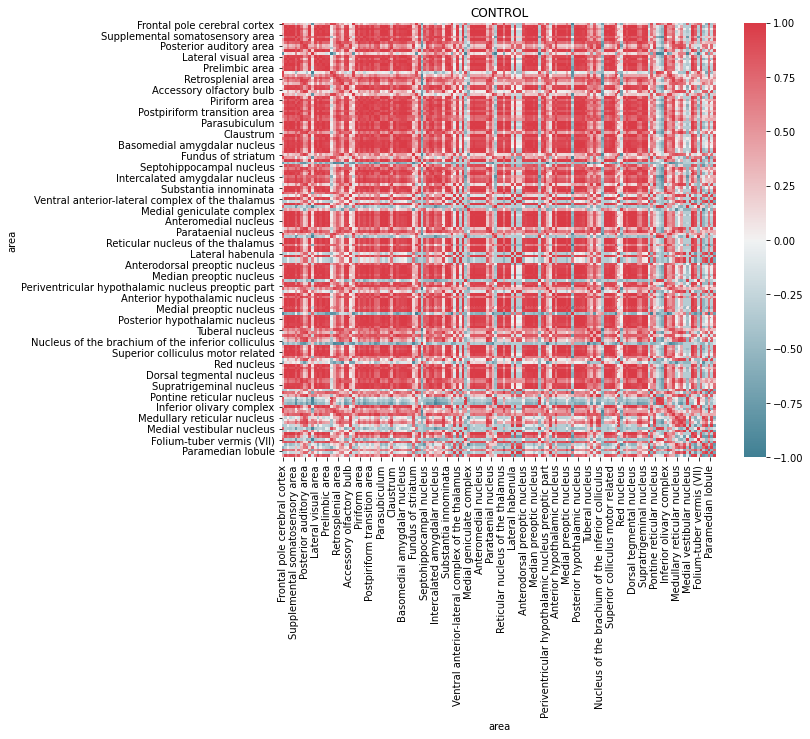

In [57]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

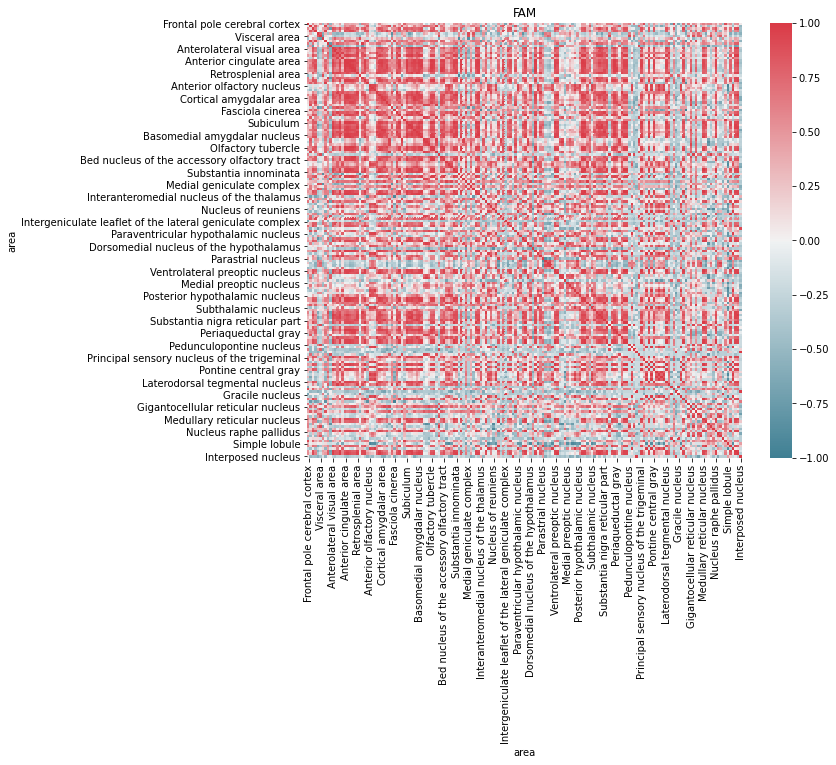

In [58]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

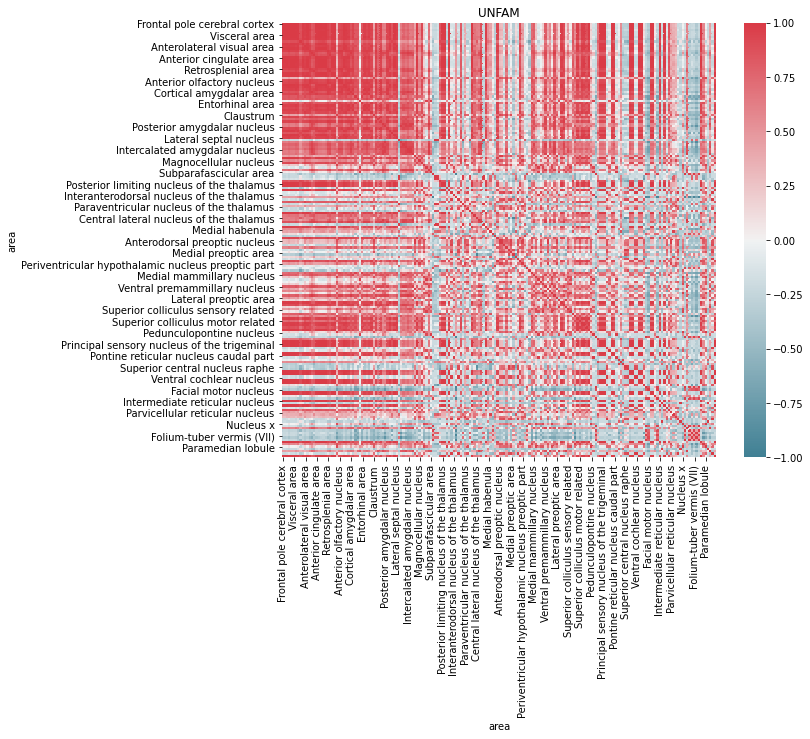

In [59]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')